In [16]:
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime



In [23]:
df_stoo = web.DataReader('^DJI', 'stooq')
df_stoo


,Open,High,Low,Close,Volume
Date,,,,,
2023-12-06,36183.73,36292.58,36024.25,36054.43,287597688.0
2023-12-05,36135.65,36164.68,36010.85,36124.56,313943660.0
2023-12-04,36089.38,36238.18,36029.69,36204.44,333822906.0
2023-12-01,35914.45,36264.85,35914.45,36245.50,333709302.0
2023-11-30,35596.57,35970.70,35592.22,35950.89,437639049.0
...,...,...,...,...,...
2018-12-14,24408.04,24431.14,24033.79,24100.51,416977200.0
2018-12-13,24575.86,24740.96,24473.29,24597.38,300003266.0
2018-12-12,24509.09,24828.29,24509.09,24527.27,344355911.0


In [19]:
#simple moving average

<AxesSubplot:xlabel='Date'>

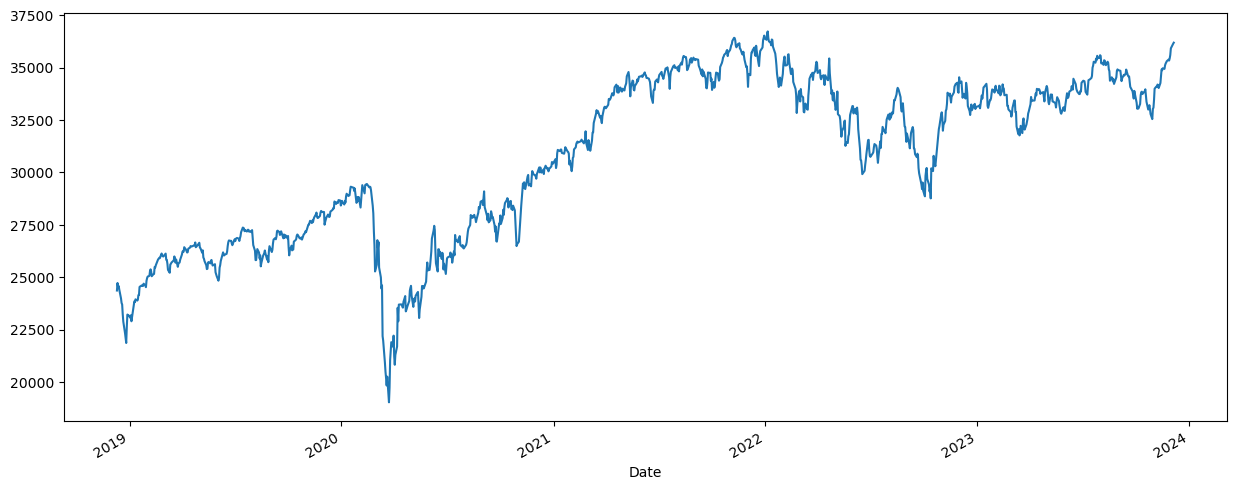

In [25]:
df_stoo['Open'].plot(figsize=(15,6))

In [27]:
df_stoo['Open:10 days rolling']=df_stoo['Open'].rolling(window=10,min_periods=1).mean()

In [30]:
df_stoo

,Open,High,Low,Close,Volume,Open:10 days rolling
Date,,,,,,
2023-12-06,36183.73,36292.58,36024.25,36054.43,287597688.0,36183.730000
2023-12-05,36135.65,36164.68,36010.85,36124.56,313943660.0,36159.690000
2023-12-04,36089.38,36238.18,36029.69,36204.44,333822906.0,36136.253333
2023-12-01,35914.45,36264.85,35914.45,36245.50,333709302.0,36080.802500
2023-11-30,35596.57,35970.70,35592.22,35950.89,437639049.0,35983.956000
...,...,...,...,...,...,...
2018-12-14,24408.04,24431.14,24033.79,24100.51,416977200.0,23197.087000
2018-12-13,24575.86,24740.96,24473.29,24597.38,300003266.0,23333.312000
2018-12-12,24509.09,24828.29,24509.09,24527.27,344355911.0,23521.315000


<AxesSubplot:xlabel='Date'>

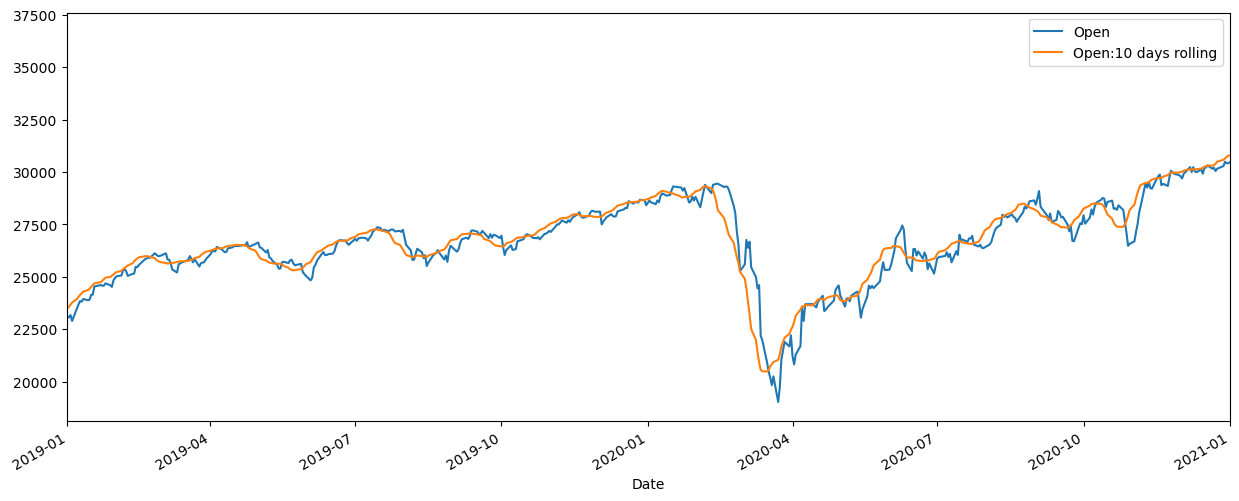

In [33]:
df_stoo[['Open','Open:10 days rolling']].plot(xlim=['2019-01-01','2021-01-01'],figsize=(15,6))

In [35]:
df_stoo['Open:30 days rolling']=df_stoo['Open'].rolling(window=30,min_periods=1).mean()
df_stoo['Open:50 days rolling']=df_stoo['Open'].rolling(window=50,min_periods=1).mean()


<AxesSubplot:xlabel='Date'>

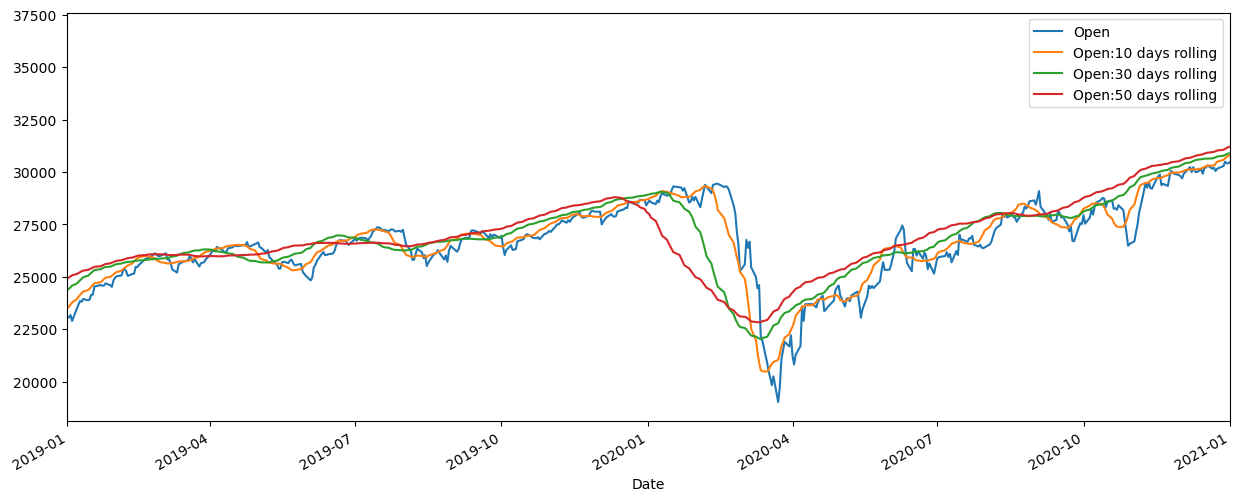

In [37]:
df_stoo[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2019-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

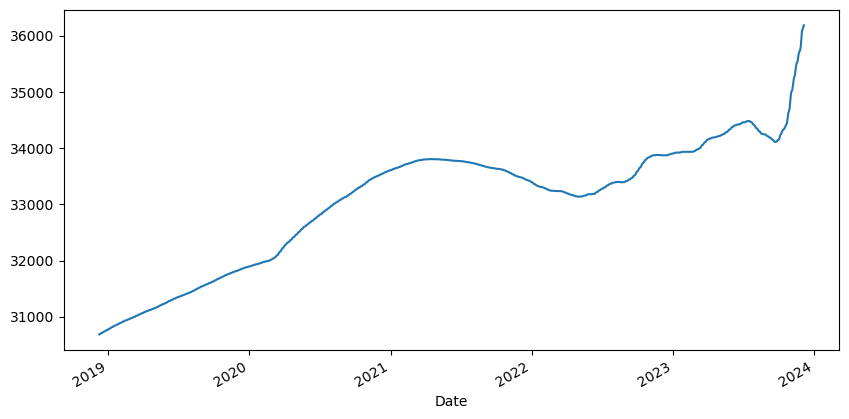

In [39]:
#expanding= cumulative moving average
df_stoo['Open'].expanding().mean().plot(figsize=(10,5))

In [47]:
#exponential weighted moving average
#let smoothening factor-0.1
df_stoo['EMA_0.1']=df_stoo['Open'].ewm(alpha=0.1, adjust=False).mean()
df_stoo['EMA_0.3']=df_stoo['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

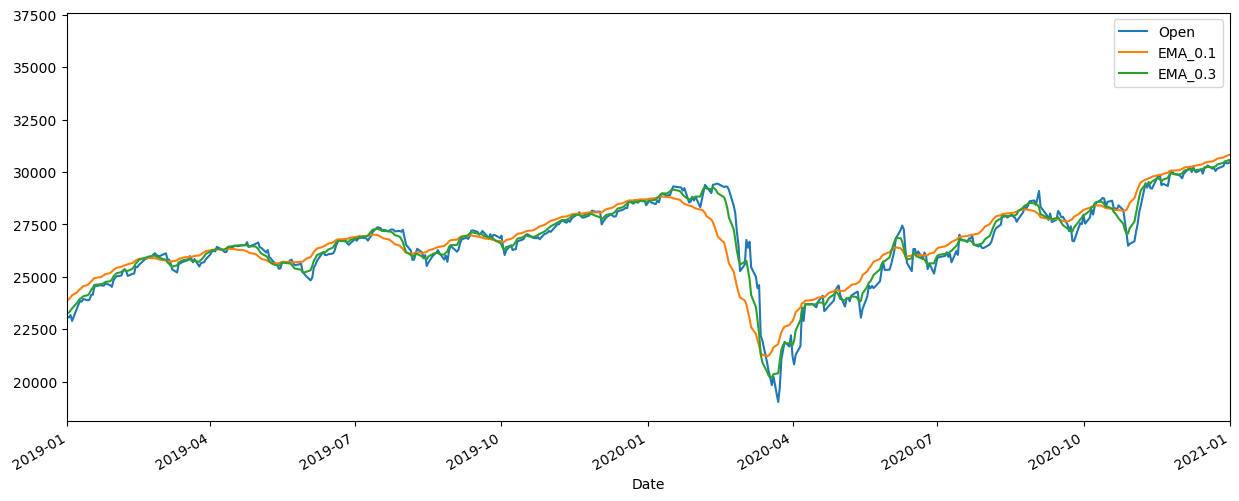

In [48]:
df_stoo[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2019-01-01','2021-01-01'],figsize=(15,6))

In [49]:
#exponential weighted moving average
#let smoothening factor-0.1
df_stoo['EMA_5days']=df_stoo['Open'].ewm(span=5).mean()


<AxesSubplot:xlabel='Date'>

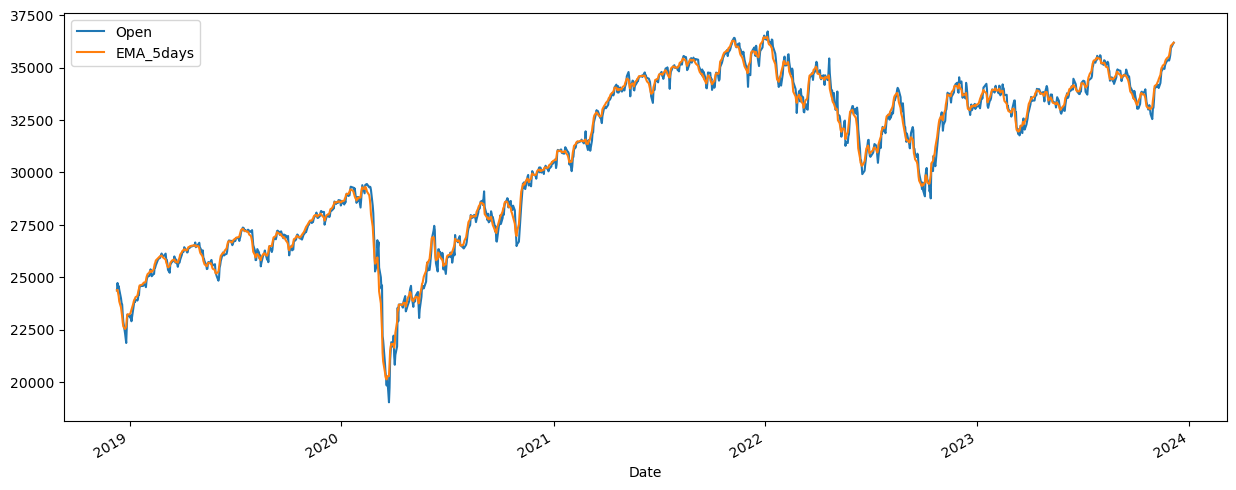

In [51]:
df_stoo[['Open','EMA_5days']].plot(figsize=(15,6))